# Classifying movie reviews

In this notebook we build a neural network to classify movie reviews as `positive` or `negative` based only on the words used in each review.

In [1]:
import warnings; warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras import models, layers, utils, optimizers, losses, metrics

#### Data 

IMDB dataset includes 50K movie reviews, half of which are used for training and the rest for testing.

In [3]:
from tensorflow.keras.datasets import imdb

In [4]:
(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data()

Each movie review is represented by an ordered list of integers, each of which represents a specific word. 

In [5]:
print(Xtrain[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Let's take a look at some properties of the data

In [6]:
# shape
print('train data size is ', Xtrain.shape)
print('test  data size is ', Xtest.shape)

# max/min vals
max_val = max([max(review) for review in Xtrain])
min_val = min([min(review) for review in Xtrain])
print('max, min valuse in the train data are '+ str(min_val) + ', ' + str(max_val))

train data size is  (25000,)
test  data size is  (25000,)
max, min valuse in the train data are 1, 88586


If we want to read the original text of any specific review, we can do that as follows

In [7]:
def getReviewText(Xtrain,reviewIndex):
    # word_index is a one-to-one mapping of words to integers
    word_index = imdb.get_word_index()
    # reverse_word_index is a new one-to-one mapping of integers to words, reversing word_index's mapping 
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    # We decode the review; note that our indices were offset by 3
    # because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in Xtrain[reviewIndex][1:]])
    return decoded_review

# get the text of a specific review
getReviewText(Xtrain,1111)
getReviewText(Xtrain,5555)

"strummer's hippie past was a revelation but overall this felt like crashing a wake campfire stories work best around the intimacy of a campfire there were just too many semi boring old friends anecdotes and too much filler stock footage i love the clash and joe for not reuniting and selling their songs until now fu mick jones but this doc left me wanting to relate more using campfire storytellers without proper explanation of who is telling the anecdote alienates the viewer to some extent they should have been interviewed on their own even using strummer's 'radio dj voice' did little to glue the film together and can someone explain all the flags flying behind the campfire scenes after the awesome filth and the fury i hoped temple could deliver a joe strummer doc deserves better"

For simplicity, in our experiment we will only use the 5K most frequently used words in the data

In [8]:
Num_Words = 5000
(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data(num_words=Num_Words)

Let's take a look at some properties of the data now

In [9]:
# shape
print('train data size is ', Xtrain.shape)
print('test  data size is ', Xtest.shape)

# max/min vals
max_val = max([max(review) for review in Xtrain])
min_val = min([min(review) for review in Xtrain])
print('max, min valuse in the train data are '+ str(min_val) + ', ' + str(max_val))

train data size is  (25000,)
test  data size is  (25000,)
max, min valuse in the train data are 1, 4999


#### Data preparation

Our network expects all samples to share the same dimension of representation, namely to be represented by vectors (tensors) of equal size. We'll do that by one-hot encoding the data.

In [10]:
def OneHot(reviews,dim = 5000):
    representation = np.zeros((len(reviews), dim),dtype=float)
    for n, review in enumerate(reviews):
        representation[n, review] = 1  
    return representation

In [11]:
# One-hot encoding of our data
Xtrain = OneHot(Xtrain,dim=Num_Words)
Xtest  = OneHot(Xtest,dim=Num_Words)

Here's what our data look like now:

In [12]:
# shape
print('train data size is ', Xtrain.shape)
print('test  data size is ', Xtest.shape)

# max/min vals
max_val = max([max(review) for review in Xtrain])
min_val = min([min(review) for review in Xtrain])
print('max, min valuse in the train data are '+ str(min_val) + ', ' + str(max_val))

train data size is  (25000, 5000)
test  data size is  (25000, 5000)
max, min valuse in the train data are 0.0, 1.0


And here is how a single sample looks like

In [13]:
print(Xtrain[0])

[0. 1. 1. ... 0. 0. 0.]


### Training a network

**Network architecture**

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(Num_Words,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Network training**

We will use the `rmsprop` optimizer, and for our binary classification we will use the `binary_crossentropy` loss. We will also monitor `accuracy` during training.

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#### Using validation data during training

We can monitor, during training, how the performance of our network changes both on the data used for training, and also on data we put aside and only use to validate the results we are getting. To do that we keep part of our original training set and create a `validation dataset`.

In [16]:
Xvalidation = Xtrain[:10000]
Xtrain      = Xtrain[10000:]

Yvalidation = Ytrain[:10000]
Ytrain      = Ytrain[10000:]

Next, we now train our model for 20 epochs in mini-batches of 512 samples, and monitor the loss and the accuracy on both the the training and validation data. 

In [17]:
model.fit(Xtrain,Ytrain, epochs=20, batch_size=512, validation_data=(Xvalidation, Yvalidation));

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.5240 - acc: 0.7853 - val_loss: 0.4064 - val_acc: 0.8565
Epoch 2/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.3327 - acc: 0.8847 - val_loss: 0.3167 - val_acc: 0.8797
Epoch 3/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.2566 - acc: 0.9076 - val_loss: 0.2907 - val_acc: 0.8861
Epoch 4/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.2160 - acc: 0.9227 - val_loss: 0.2865 - val_acc: 0.8822
Epoch 5/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1897 - acc: 0.9310 - val_loss: 0.2852 - val_acc: 0.8811
Epoch 6/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1735 - acc: 0.9371 - val_loss: 0.2963 - val_acc: 0.8815
Epoch 7/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1563 - acc: 0.9440 - val_loss: 0.3030 - val_acc

We can access the monitored values during training through the `history` atribute of the trained model. Let's take a look at it:

In [18]:
history = model.history
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

It contains 4 entries: one per metric that was being monitored, each for training dataset and for validation dataset. 

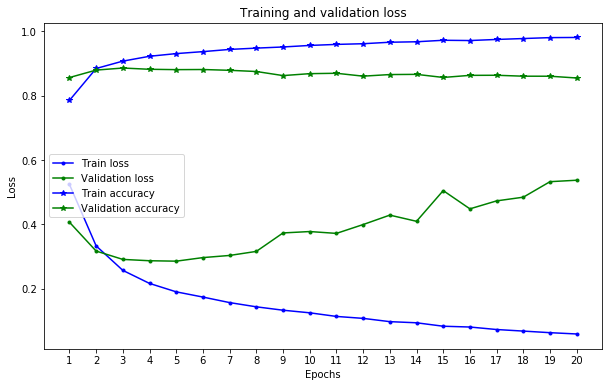

In [19]:
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = np.array(model.history.epoch)+1

plt.figure(figsize=[10,6])
plt.plot(epochs, loss, 'b.-', label='Train loss')
plt.plot(epochs, validation_loss, 'g.-', label='Validation loss')
plt.plot(epochs, accuracy, 'b*-', label='Train accuracy')
plt.plot(epochs, validation_accuracy, 'g*-', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend();

Let's train a new network from scratch for five epochs, then evaluate it on our test data:

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(Num_Words,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',  metrics=['accuracy'])

model.fit(Xtrain, Ytrain, epochs=5, batch_size=512);

Epoch 1/5
15000/15000 [==============================] - 1s 64us/step - loss: 0.5487 - acc: 0.7813
Epoch 2/5
15000/15000 [==============================] - 1s 50us/step - loss: 0.3581 - acc: 0.8856
Epoch 3/5
15000/15000 [==============================] - 1s 48us/step - loss: 0.2772 - acc: 0.9073
Epoch 4/5
15000/15000 [==============================] - 1s 49us/step - loss: 0.2304 - acc: 0.9203
Epoch 5/5
15000/15000 [==============================] - 1s 48us/step - loss: 0.2011 - acc: 0.9301


In [21]:
print('Train accuracy      = ', model.evaluate(Xtrain, Ytrain, verbose=0)[1])
print('Validation accuracy = ', model.evaluate(Xvalidation, Yvalidation, verbose=0)[1])
print('Test accuracy       = ', model.evaluate(Xtest, Ytest, verbose=0)[1])

Train accuracy      =  0.9442
Validation accuracy =  0.8857
Test accuracy       =  0.8786


#### Using the trained network to classify new reviews

In [22]:
YtestHat = model.predict(Xtest)

Just to get an idea of what the network produces, we can plot how its output is distributed (note that this is a histogram of probabilities)

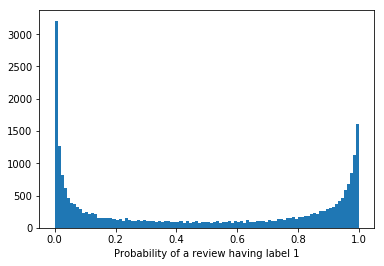

In [23]:
plt.hist(YtestHat,bins=100)
plt.xlabel('Probability of a review having label 1');

#### Exercise

Repeat the above twice, for the following settings 
1. using the `mse` loss function instead of `binary_crossentropy`
2. using the `tanh` activation instead of `relu`

**Solution**

In [24]:
# 1


In [25]:
# 2
